In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pycaret

     |████████████████████████████████| 266 kB 11.9 MB/s 
     |████████████████████████████████| 167 kB 46.4 MB/s 
     |████████████████████████████████| 1.3 MB 48.1 MB/s 
     |████████████████████████████████| 6.8 MB 45.8 MB/s 
     |████████████████████████████████| 111 kB 52.4 MB/s 
     |████████████████████████████████| 248 kB 50.8 MB/s 
     |████████████████████████████████| 14.6 MB 122 kB/s 
     |████████████████████████████████| 1.7 MB 49.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 80 kB 8.3 MB/s 
     |████████████████████████████████| 2.0 MB 42.9 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 271 kB 50.4 MB/s 
     |████████████████████████████████| 62 kB 709 kB/s 
     |████████████████████████████████| 636 kB 40.4 MB/s 
     |███████████████████

In [3]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pycaret.classification import *

In [4]:
train2=pd.read_csv('/content/gdrive/MyDrive/신용카드data/train.csv')
test2=pd.read_csv('/content/gdrive/MyDrive/신용카드data/test.csv')

In [5]:
del train2["index"]
train2.fillna('NAN', inplace=True) 
del test2["index"]
test2.fillna('NAN', inplace=True)

In [6]:
setup_clf = setup(data=train2,target="credit")

,Description,Value
0,session_id,661
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 19)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
lightgbm = create_model("lightgbm",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6998,0.7064,0.4293,0.6812,0.6257,0.2437,0.3223
1,0.7138,0.7228,0.4433,0.7658,0.6411,0.2766,0.3685
2,0.7014,0.7146,0.4362,0.6957,0.6309,0.2533,0.3269
3,0.6971,0.7153,0.4229,0.6779,0.6196,0.2335,0.3134
4,0.6960,0.7053,0.4268,0.6831,0.6219,0.2363,0.3095
5,0.6928,0.7021,0.4247,0.6678,0.6193,0.2302,0.2992
6,0.6949,0.7068,0.4231,0.6799,0.6183,0.2280,0.3080
7,0.7063,0.7188,0.4358,0.7197,0.6314,0.2549,0.3481
8,0.6949,0.6888,0.4240,0.6759,0.6193,0.2297,0.3078
9,0.6953,0.7011,0.4237,0.6833,0.6191,0.2291,0.3080


In [8]:
rf = create_model("rf",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7019,0.7400,0.5409,0.6806,0.6844,0.3687,0.3764
1,0.7273,0.7673,0.5760,0.7100,0.7129,0.4281,0.4351
2,0.6852,0.7457,0.5298,0.6653,0.6724,0.3526,0.3557
3,0.7073,0.7576,0.5625,0.6906,0.6956,0.3962,0.4002
4,0.7019,0.7634,0.5404,0.6806,0.6857,0.3771,0.3825
5,0.6992,0.7537,0.5561,0.6828,0.6880,0.3827,0.3858
6,0.7052,0.7352,0.5433,0.6841,0.6870,0.3748,0.3830
7,0.7100,0.7538,0.5569,0.6916,0.6945,0.3899,0.3975
8,0.7003,0.7429,0.5369,0.6782,0.6824,0.3653,0.3731
9,0.6915,0.7411,0.5068,0.6626,0.6663,0.3297,0.3417


In [9]:
gbc = create_model("gbc",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6987,0.6628,0.4170,0.7444,0.6154,0.2267,0.3204
1,0.7046,0.6534,0.4235,0.6757,0.6232,0.2397,0.3440
2,0.6976,0.6556,0.4148,0.6226,0.6138,0.2242,0.3168
3,0.6933,0.6683,0.4096,0.6961,0.6071,0.2086,0.3027
4,0.6901,0.6512,0.4041,0.6025,0.6017,0.2013,0.2897
5,0.6863,0.6521,0.4018,0.6249,0.5988,0.1926,0.2764
6,0.6917,0.6715,0.4095,0.6984,0.6058,0.2046,0.2987
7,0.6922,0.6706,0.4072,0.6569,0.6047,0.2054,0.3014
8,0.6917,0.6628,0.4084,0.6149,0.6056,0.2060,0.2976
9,0.6931,0.6751,0.4101,0.6139,0.6080,0.2120,0.3012


In [10]:
train=pd.read_csv('/content/gdrive/MyDrive/신용카드data/train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/신용카드data/test.csv')
del train["index"]
train.fillna('NAN', inplace=True) 
del test["index"]
test.fillna('NAN', inplace=True)

In [11]:
setup_clf2= setup(train,target="credit",feature_selection=True,feature_ratio=True,feature_interaction=True,normalize=True)
## feature_selection는 중요도의 의거하여 feature를 줄여준다,
#interaction은 데이터 세트의 모든 숫자 변수에 대해 상호작용하여 새 feature를 생성,
#ratio는 True로 설정하면 데이터 세트에 있는 모든 숫자 변수의 비율을 계산하여 피쳐생성
#normalize 데이터 정규화

,Description,Value
0,session_id,4213
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 19)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
lightgbm2 = create_model("lightgbm",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7111,0.7361,0.4542,0.7095,0.6473,0.2866,0.3625
1,0.7052,0.7153,0.4434,0.7006,0.6368,0.2690,0.3451
2,0.6922,0.7025,0.4346,0.6945,0.6237,0.2357,0.3040
3,0.6928,0.7062,0.4253,0.6746,0.6187,0.2305,0.3054
4,0.7073,0.7172,0.4508,0.7070,0.6423,0.2790,0.3515
5,0.6998,0.7017,0.4365,0.6690,0.6311,0.2587,0.3267
6,0.7019,0.6943,0.4424,0.6977,0.6347,0.2604,0.3338
7,0.7063,0.7355,0.4428,0.7093,0.6365,0.2684,0.3478
8,0.7046,0.6880,0.4412,0.6998,0.6351,0.2663,0.3421
9,0.6931,0.6994,0.4269,0.6645,0.6212,0.2382,0.3043


In [13]:
rf2 = create_model("rf",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7030,0.7240,0.4841,0.6734,0.6621,0.3173,0.3489
1,0.6987,0.7144,0.4783,0.6653,0.6569,0.3090,0.3393
2,0.6949,0.6940,0.4679,0.6694,0.6478,0.2864,0.3229
3,0.6960,0.7007,0.4676,0.6660,0.6486,0.2889,0.3265
4,0.6928,0.7131,0.4685,0.6551,0.6487,0.2940,0.3232
5,0.6992,0.7003,0.4716,0.6601,0.6550,0.3072,0.3385
6,0.6874,0.6894,0.4602,0.6524,0.6405,0.2712,0.3044
7,0.7057,0.7006,0.4844,0.6769,0.6630,0.3218,0.3547
8,0.6922,0.7038,0.4702,0.6643,0.6476,0.2870,0.3184
9,0.6904,0.6803,0.4654,0.6535,0.6458,0.2850,0.3147


In [14]:
gbc2 = create_model("gbc",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7009,0.6951,0.4244,0.7109,0.6214,0.2392,0.3331
1,0.6955,0.6686,0.4155,0.6843,0.6117,0.2217,0.3175
2,0.6895,0.6606,0.4093,0.6549,0.6047,0.2065,0.2958
3,0.6976,0.6479,0.4182,0.6916,0.6149,0.2269,0.3252
4,0.6949,0.6865,0.4170,0.6561,0.6135,0.2272,0.3124
5,0.6987,0.6689,0.4216,0.6713,0.6188,0.2366,0.3242
6,0.6944,0.6529,0.4153,0.7127,0.6112,0.2177,0.3118
7,0.6987,0.6955,0.4221,0.6882,0.6189,0.2372,0.3243
8,0.6944,0.6467,0.4143,0.6509,0.6114,0.2245,0.3092
9,0.6926,0.6568,0.4130,0.6887,0.6096,0.2181,0.3022


In [15]:
blender = blend_models(estimator_list = [lightgbm2,rf2,gbc2], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7106,0.7391,0.4503,0.7074,0.6447,0.2825,0.3610
1,0.7014,0.7253,0.4333,0.6849,0.6286,0.2563,0.3326
2,0.6944,0.7067,0.4278,0.6910,0.6208,0.2348,0.3104
3,0.7003,0.7138,0.4333,0.7047,0.6273,0.2476,0.3307
4,0.6982,0.7264,0.4314,0.6696,0.6262,0.2518,0.3217
5,0.7041,0.7101,0.4368,0.6790,0.6330,0.2644,0.3403
6,0.6987,0.6998,0.4343,0.6855,0.6279,0.2491,0.3235
7,0.7063,0.7279,0.4391,0.7082,0.6346,0.2676,0.3470
8,0.6971,0.7076,0.4260,0.6781,0.6215,0.2416,0.3174
9,0.6958,0.6960,0.4276,0.6828,0.6223,0.2406,0.3124


In [16]:
blender2=blend_models(estimator_list = [lightgbm,rf,gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7111,0.7383,0.4528,0.7121,0.6462,0.2839,0.3633
1,0.7036,0.7229,0.4371,0.6882,0.6322,0.2631,0.3395
2,0.6928,0.7046,0.4248,0.6912,0.6178,0.2292,0.3049
3,0.6982,0.7134,0.4300,0.6994,0.6240,0.2408,0.3236
4,0.7036,0.7227,0.4380,0.6909,0.6328,0.2645,0.3391
5,0.7052,0.7146,0.4376,0.6774,0.6342,0.2673,0.3435
6,0.7009,0.6990,0.4376,0.6887,0.6312,0.2556,0.3306
7,0.7057,0.7302,0.4384,0.7069,0.6338,0.2662,0.3453
8,0.6992,0.7077,0.4317,0.6861,0.6264,0.2503,0.3246
9,0.6985,0.7000,0.4295,0.6820,0.6250,0.2471,0.3214


In [17]:
model = finalize_model(blender)

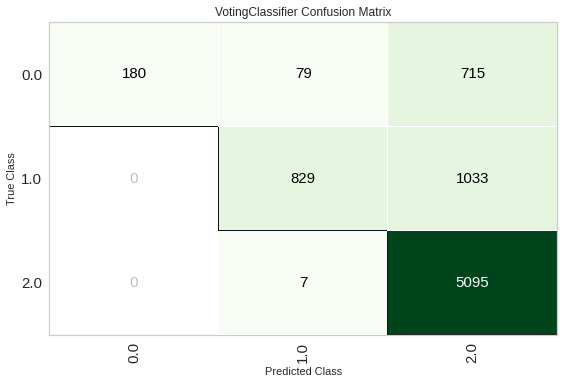

In [18]:
plot_model(model, plot = 'confusion_matrix')

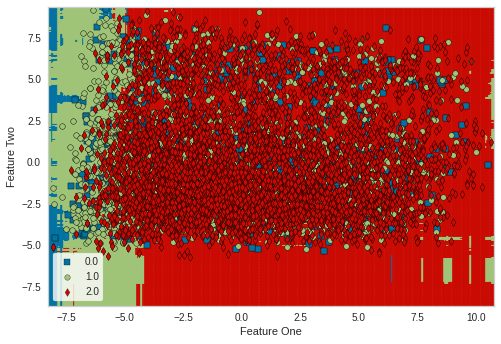

In [19]:
plot_model(model, plot = 'boundary')

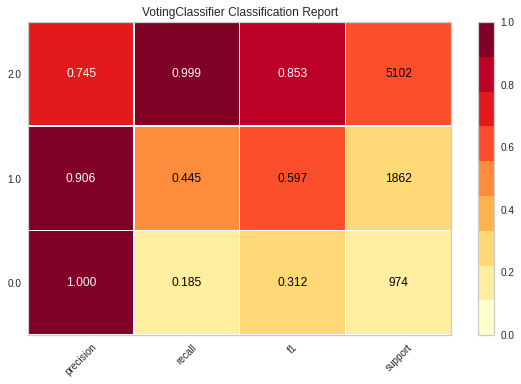

In [20]:
plot_model(model, plot = 'class_report')